# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [3]:
# data folder pointer
data_dir = 'data/Volcano'

In [4]:
# view files available
_files = os.listdir(data_dir)
print _files

['datapoints.csv', 'datatypes.csv', 'nodes.csv', 'sensors.csv', 'volcanos.csv']


In [5]:
# load all files into separate dataframes
nodes = pd.read_csv('data/Volcano/nodes.csv', encoding='utf-8')
sensors = pd.read_csv('data/Volcano/sensors.csv', encoding='utf-8')
volcanos = pd.read_csv('data/Volcano/volcanos.csv', encoding='utf-8')
dtypes = pd.read_csv('data/Volcano/datatypes.csv', encoding='utf-8')
datapoints = pd.read_csv('data/Volcano/datapoints.csv', encoding='utf-8')

In [6]:
# check datapoints file
datapoints.shape
#datapoints.head()

(176534, 4)

In [7]:
# convert timestamps to datetime 
nodes['created_at'] = pd.to_datetime(nodes['created_at'])
nodes['updated_at'] = pd.to_datetime(nodes['updated_at'])

sensors['created_at'] = pd.to_datetime(sensors['created_at'])
sensors['updated_at'] = pd.to_datetime(sensors['updated_at'])

datapoints['timestamp'] = pd.to_datetime(datapoints['timestamp'])

volcanos['created_at'] = pd.to_datetime(volcanos['created_at'])
volcanos['updated_at'] = pd.to_datetime(volcanos['updated_at'])

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [8]:
#check for nulls and fill
datapoints.isnull().sum()

id                0
value        113078
timestamp         0
sensor_id         0
dtype: int64

In [9]:
# basic statistics
datapoints.describe()

,value
count,6.345600e+04
mean,1.436540e+05
std,1.497966e+06
min,-1.529700e+02
25%,2.524000e+01
50%,7.300000e+01
75%,9.900000e+01
max,1.677295e+07


In [10]:
#datapoints = datapoints.fillna(datapoints.mean()) # took too long to fill

# remove na rows
datapoints=datapoints.dropna()

In [11]:
# check size
datapoints.shape

(63456, 4)

In [12]:
# check columns and types
datapoints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 176533
Data columns (total 4 columns):
id           63456 non-null object
value        63456 non-null float64
timestamp    63456 non-null datetime64[ns]
sensor_id    63456 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ MB


In [13]:
# Index the dataframe in dateTime
datapoints.index = datapoints['timestamp']

In [14]:
# get list of unique sensors
list_sensors = datapoints['sensor_id'].unique()
list_sensors.size

60

C:\Users\0038356\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


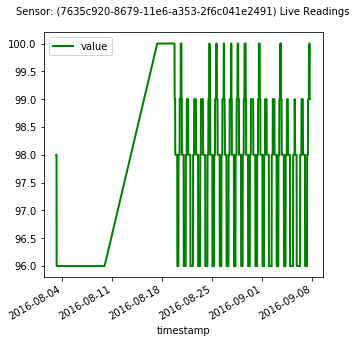

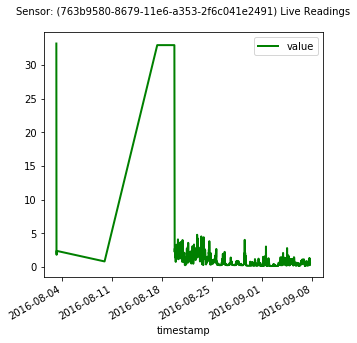

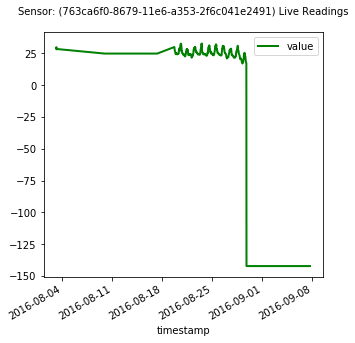

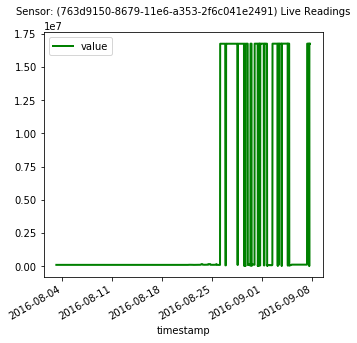

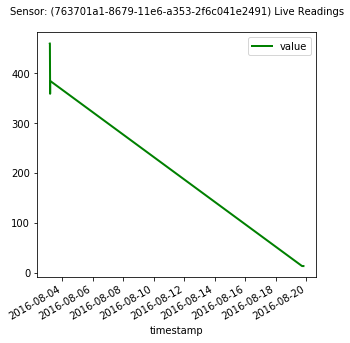

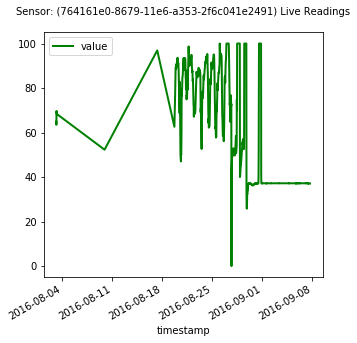

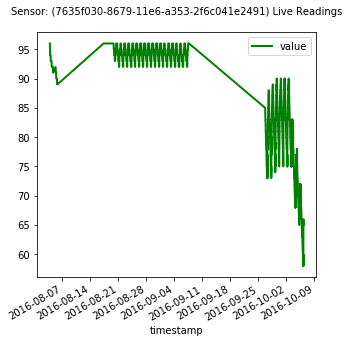

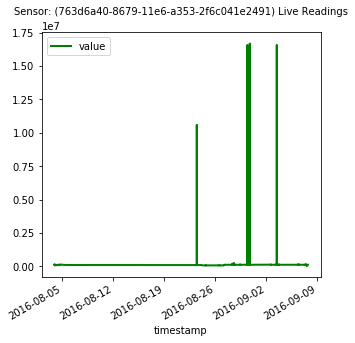

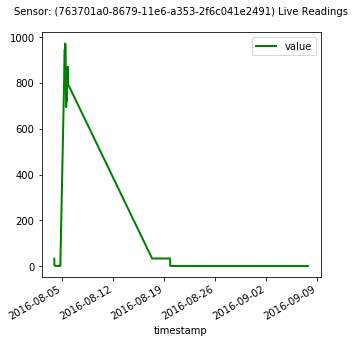

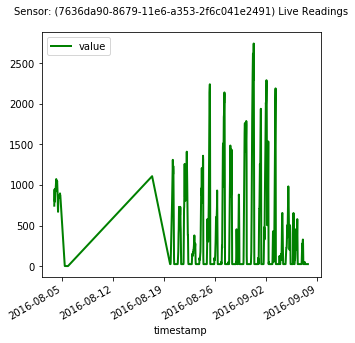

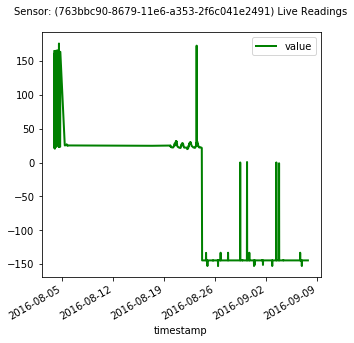

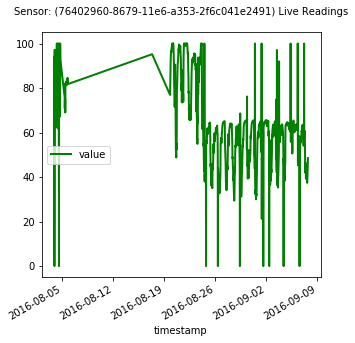

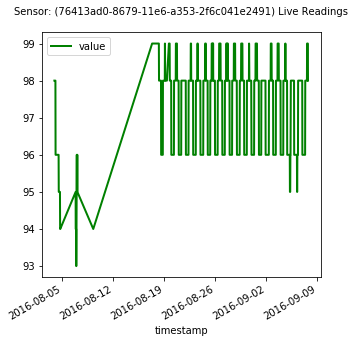

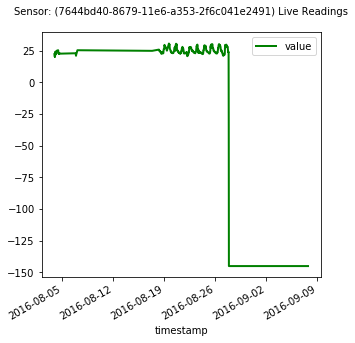

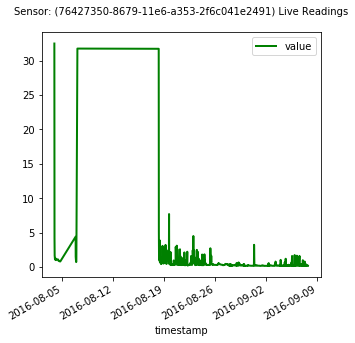

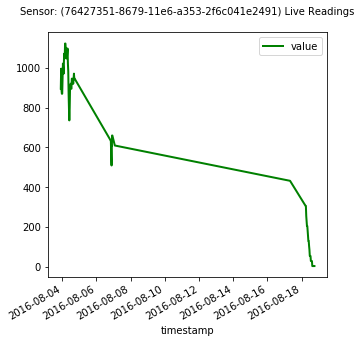

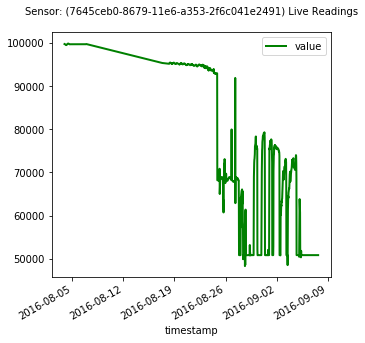

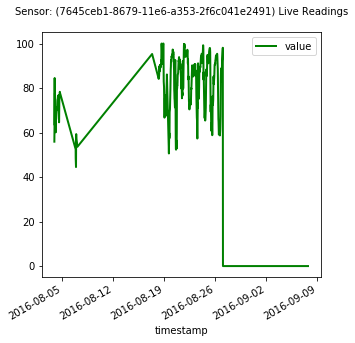

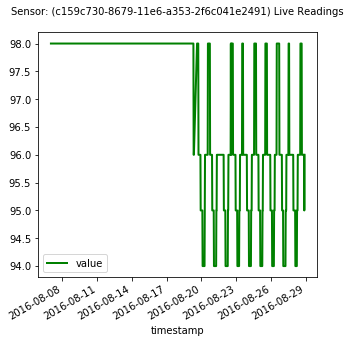

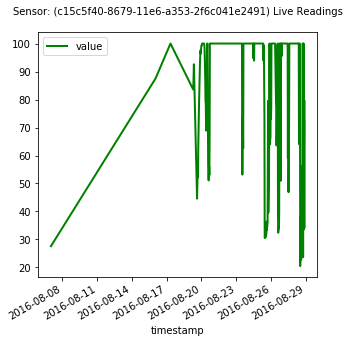

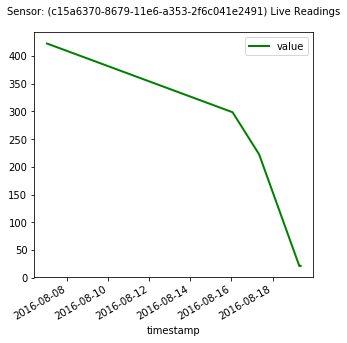

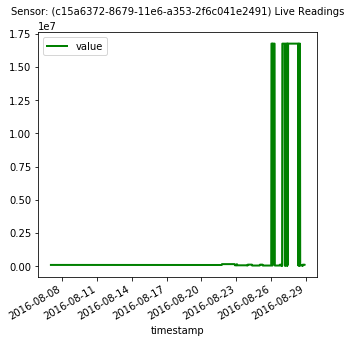

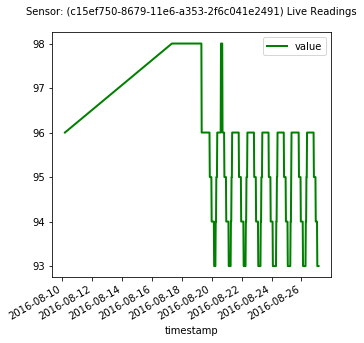

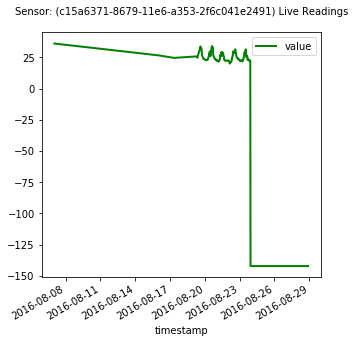

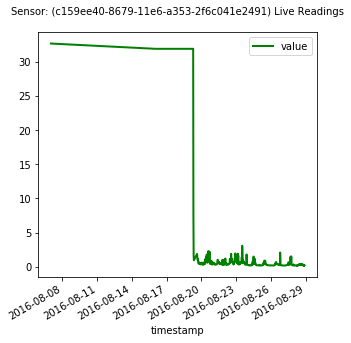

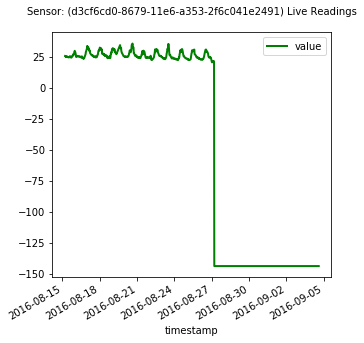

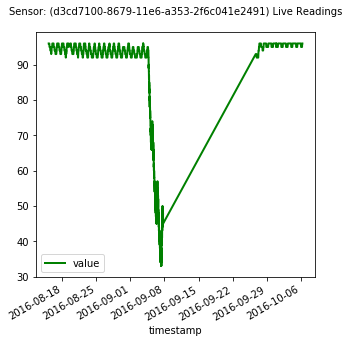

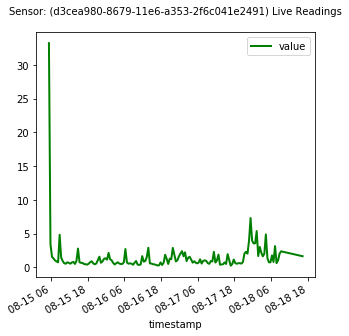

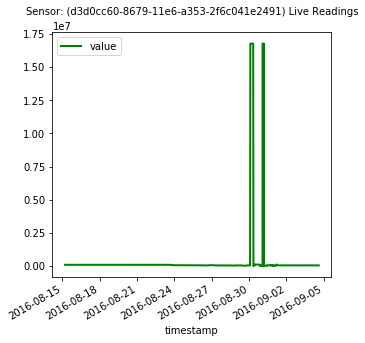

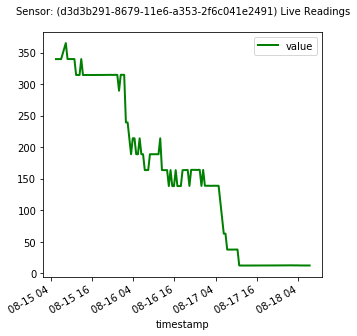

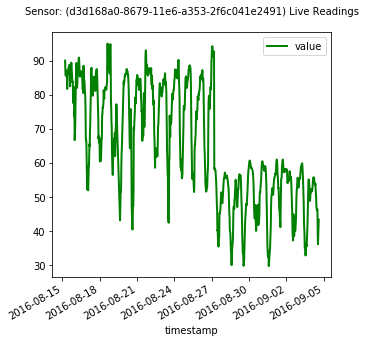

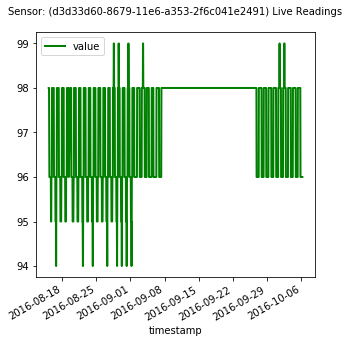

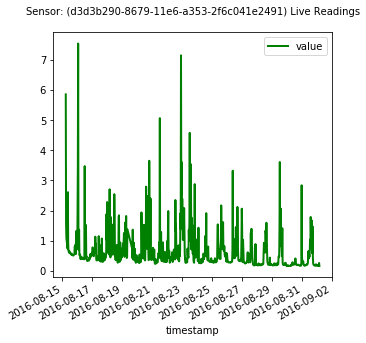

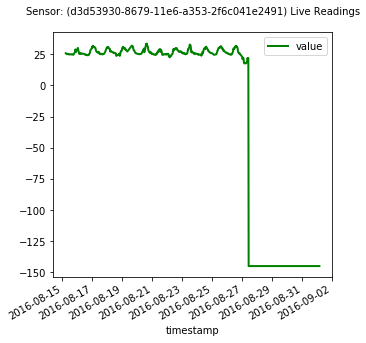

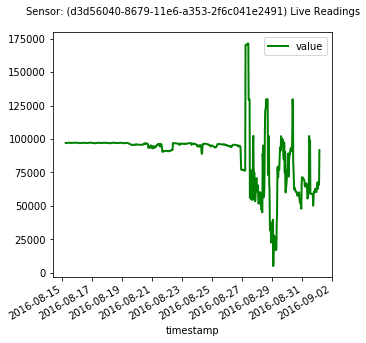

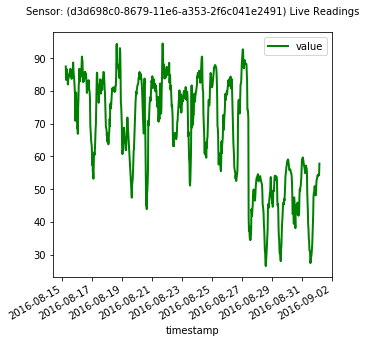

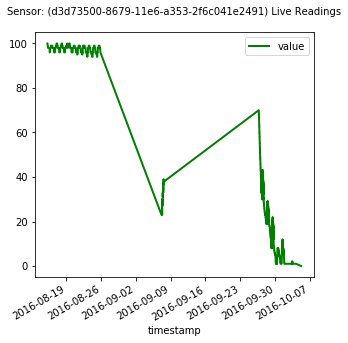

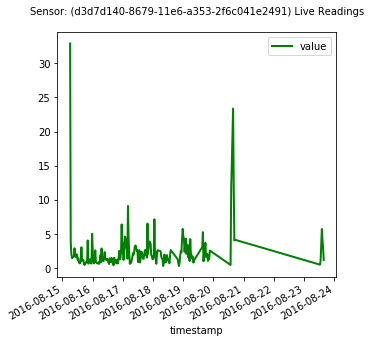

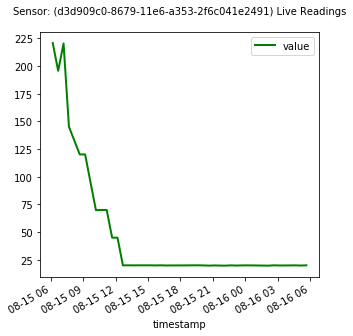

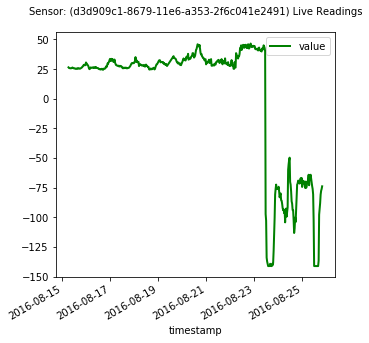

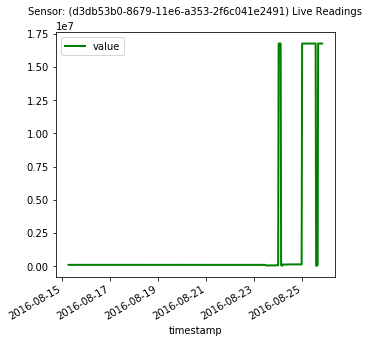

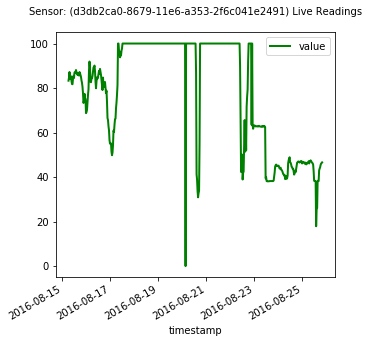

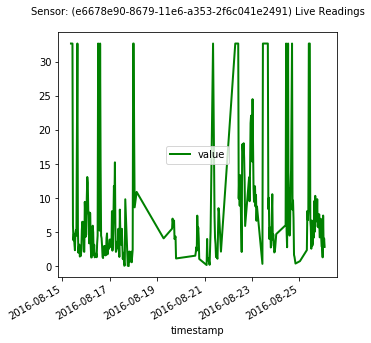

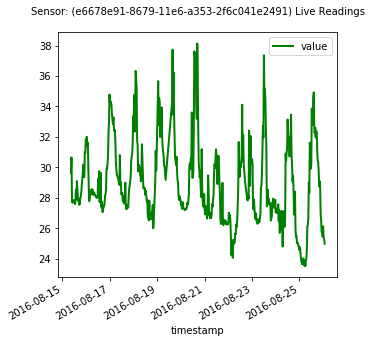

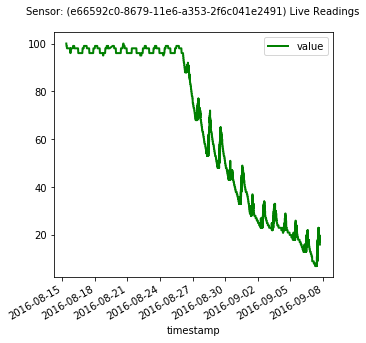

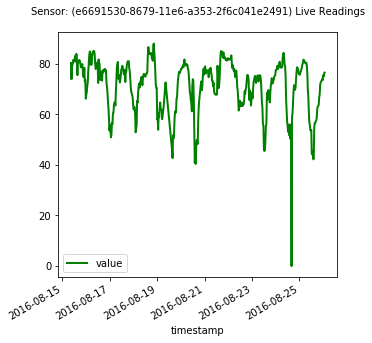

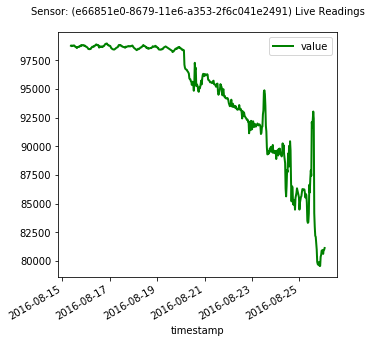

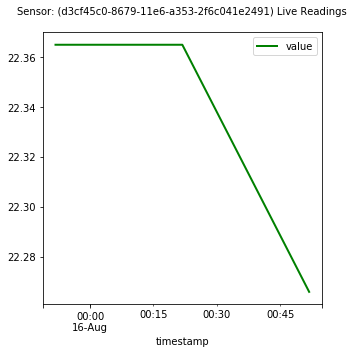

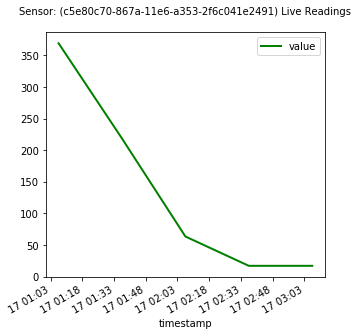

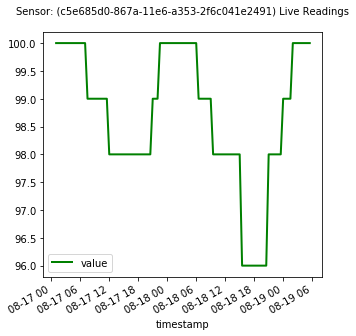

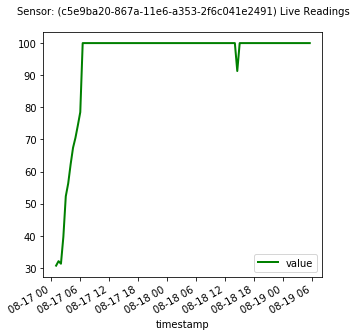

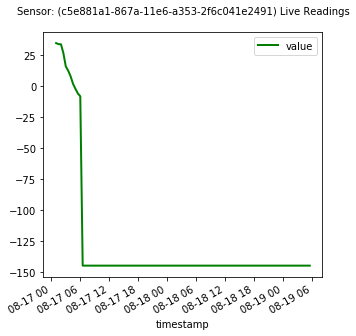

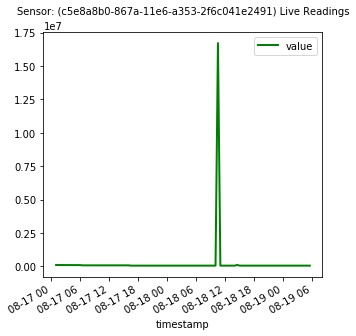

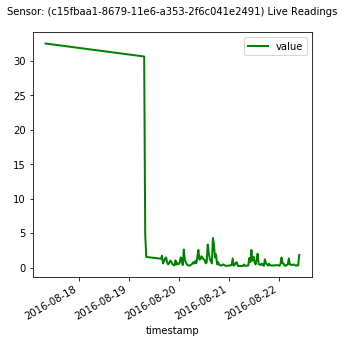

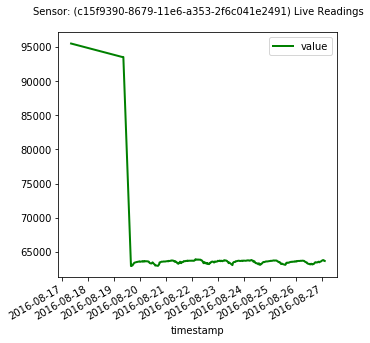

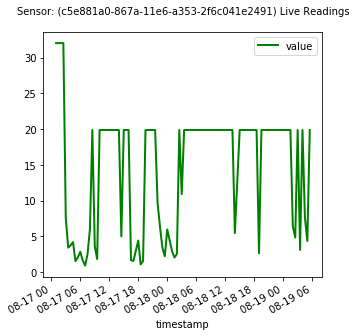

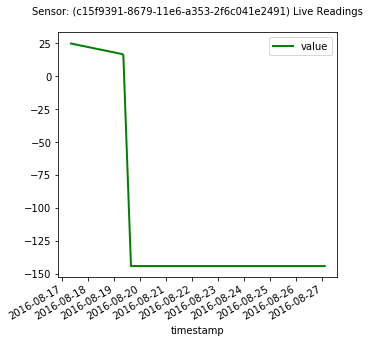

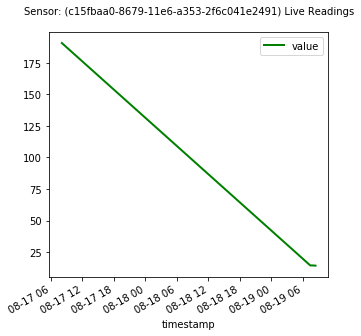

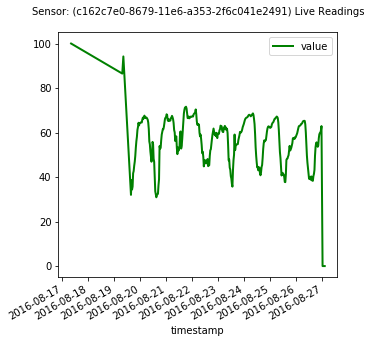

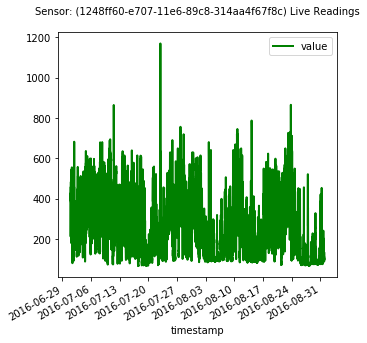

In [15]:
# for each sensor plot time-series graphs and save to file
for x in list_sensors:
    sensor = datapoints['sensor_id'] == x
    datapoints[sensor][['value']].plot(figsize=(5, 5), style='g', linewidth=2)
    plt.title("Sensor: (" + x + ") Live Readings\n", fontsize=10)
    plt.savefig('data/TimeSeriesPlots/' + x + '.png')

There are 60 unique sensors in the datapoints file. All of the sensors are measuring readings. To say anything in detail about the plots would require investigation into each of the 60 graphs.

### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [16]:
# check sensor data
sensors.head()

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.797,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.811,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [17]:
# number of sensors by types
sensors.data_type_id.value_counts()

35dcdad0-8679-11e6-bda3-ef77801087ee    10
35dcb3c2-8679-11e6-bda3-ef77801087ee    10
35dcdad2-8679-11e6-bda3-ef77801087ee    10
35dcb3c0-8679-11e6-bda3-ef77801087ee    10
35dcdad1-8679-11e6-bda3-ef77801087ee    10
35dcb3c1-8679-11e6-bda3-ef77801087ee    10
ed5edee0-e701-11e6-83c1-01ce06e6d17f     1
Name: data_type_id, dtype: int64

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

In [18]:
# merge sensors and datatypes dataframes
sensor_dtypes = pd.merge(sensors, dtypes, left_on='data_type_id', right_on='id')
sensor_dtypes.head()

,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id_y,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
1,7636da90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32,2016-09-30 18:12:04.577,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
2,76427351-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40,2016-09-29 19:20:17.416,35dcdad0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
3,763701a1-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 19:20:17.431,35dcdad0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,c15fbaa0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.523,35dcdad0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2


Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [19]:
# merge datapoints with sensor and types
full = pd.merge(datapoints, sensor_dtypes, left_on='sensor_id', right_on='id_x')
full.head()

,id,value,timestamp,sensor_id,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id_y,type,si_unit,type_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
1,765251d0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:47:41,7635c920-8679-11e6-a353-2f6c041e2491,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
2,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:08:52,7635c920-8679-11e6-a353-2f6c041e2491,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
3,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:14:08,7635c920-8679-11e6-a353-2f6c041e2491,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
4,765dea90-8679-11e6-a353-2f6c041e2491,96.0,2016-08-03 05:28:55,7635c920-8679-11e6-a353-2f6c041e2491,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT


-----

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

In [ ]:
# convert to datetime and set index
full['timestamp'] = pd.to_datetime(full['timestamp'])
full.index = full['timestamp']

In [ ]:
# resample the dataset to a daily level
daily = []
daily=pd.DataFrame(columns=['Mean'])
daily['Mean'] = full[full.type_id=='HUMA']['value'].resample('D').mean()

In [ ]:
daily.head()

In [ ]:
for x in list_sensors:
    sensor = full['sensor_id'] == x
    daily_mean[x] = full[full.sensor_id == sensor]['value'].resample('D').mean()
    daily_max[x] = full[full.sensor_id == sensor]['value'].resample('D').max()
    daily_min[x] = full[full.sensor_id == sensor]['value'].resample('D').min()
    daily = pd.concat([daily_mean, daily_max, daily_min], axis=1)
    daily.columns= ['Mean', 'Max', 'Min']
#daily[full.sensor_id == "7635c920-8679-11e6-a353-2f6c041e2491"] 

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Text(0.5,1,u'Sensor: (1248ff60-e707-11e6-89c8-314aa4f67f8c) Live Readings\n')

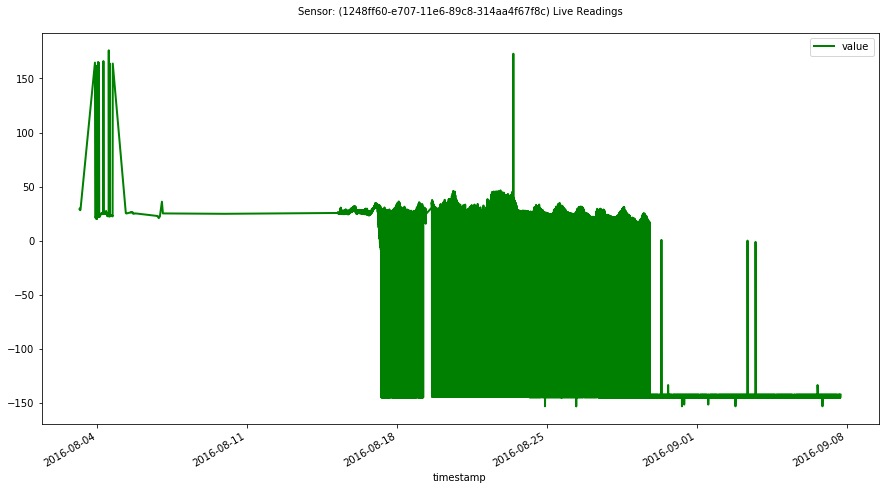

In [40]:
# Plot sensors over time for TCA
full.index = full['timestamp']

full[full.type_id == 'TCA'][['value']].plot(figsize=(15, 8), style='g', linewidth=2)
plt.title("Sensor: (" + x + ") Live Readings\n", fontsize=10)

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

In [41]:
# identify all temperature sensors
temp_sensors = [s for s in full[full.type_id =='TCA']['id_x']]
#temperature_sensors = [s for t,s in zip(full['type_id'], full['id_x']) if t=='TCA'] # alternative way
temp_sensors = set(temp_sensors)
temp_sensors

{u'763bbc90-8679-11e6-a353-2f6c041e2491',
 u'763ca6f0-8679-11e6-a353-2f6c041e2491',
 u'7644bd40-8679-11e6-a353-2f6c041e2491',
 u'c15a6371-8679-11e6-a353-2f6c041e2491',
 u'c15f9391-8679-11e6-a353-2f6c041e2491',
 u'c5e881a1-867a-11e6-a353-2f6c041e2491',
 u'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
 u'd3d53930-8679-11e6-a353-2f6c041e2491',
 u'd3d909c1-8679-11e6-a353-2f6c041e2491',
 u'e6678e91-8679-11e6-a353-2f6c041e2491'}

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

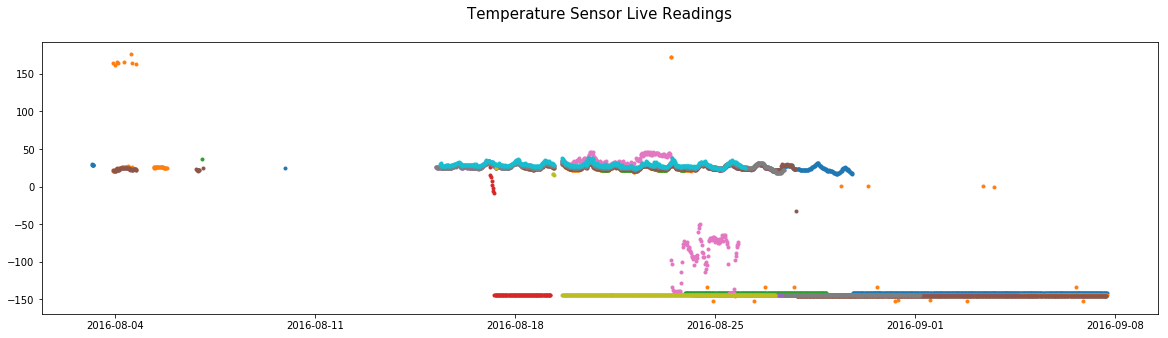

In [44]:
# graphs of temperature sensors
plt.figure(figsize=(20,5))

for s in temp_sensors:
    #print(s)
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')
    plt.title("Temperature Sensor Live Readings\n", fontsize=15)

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

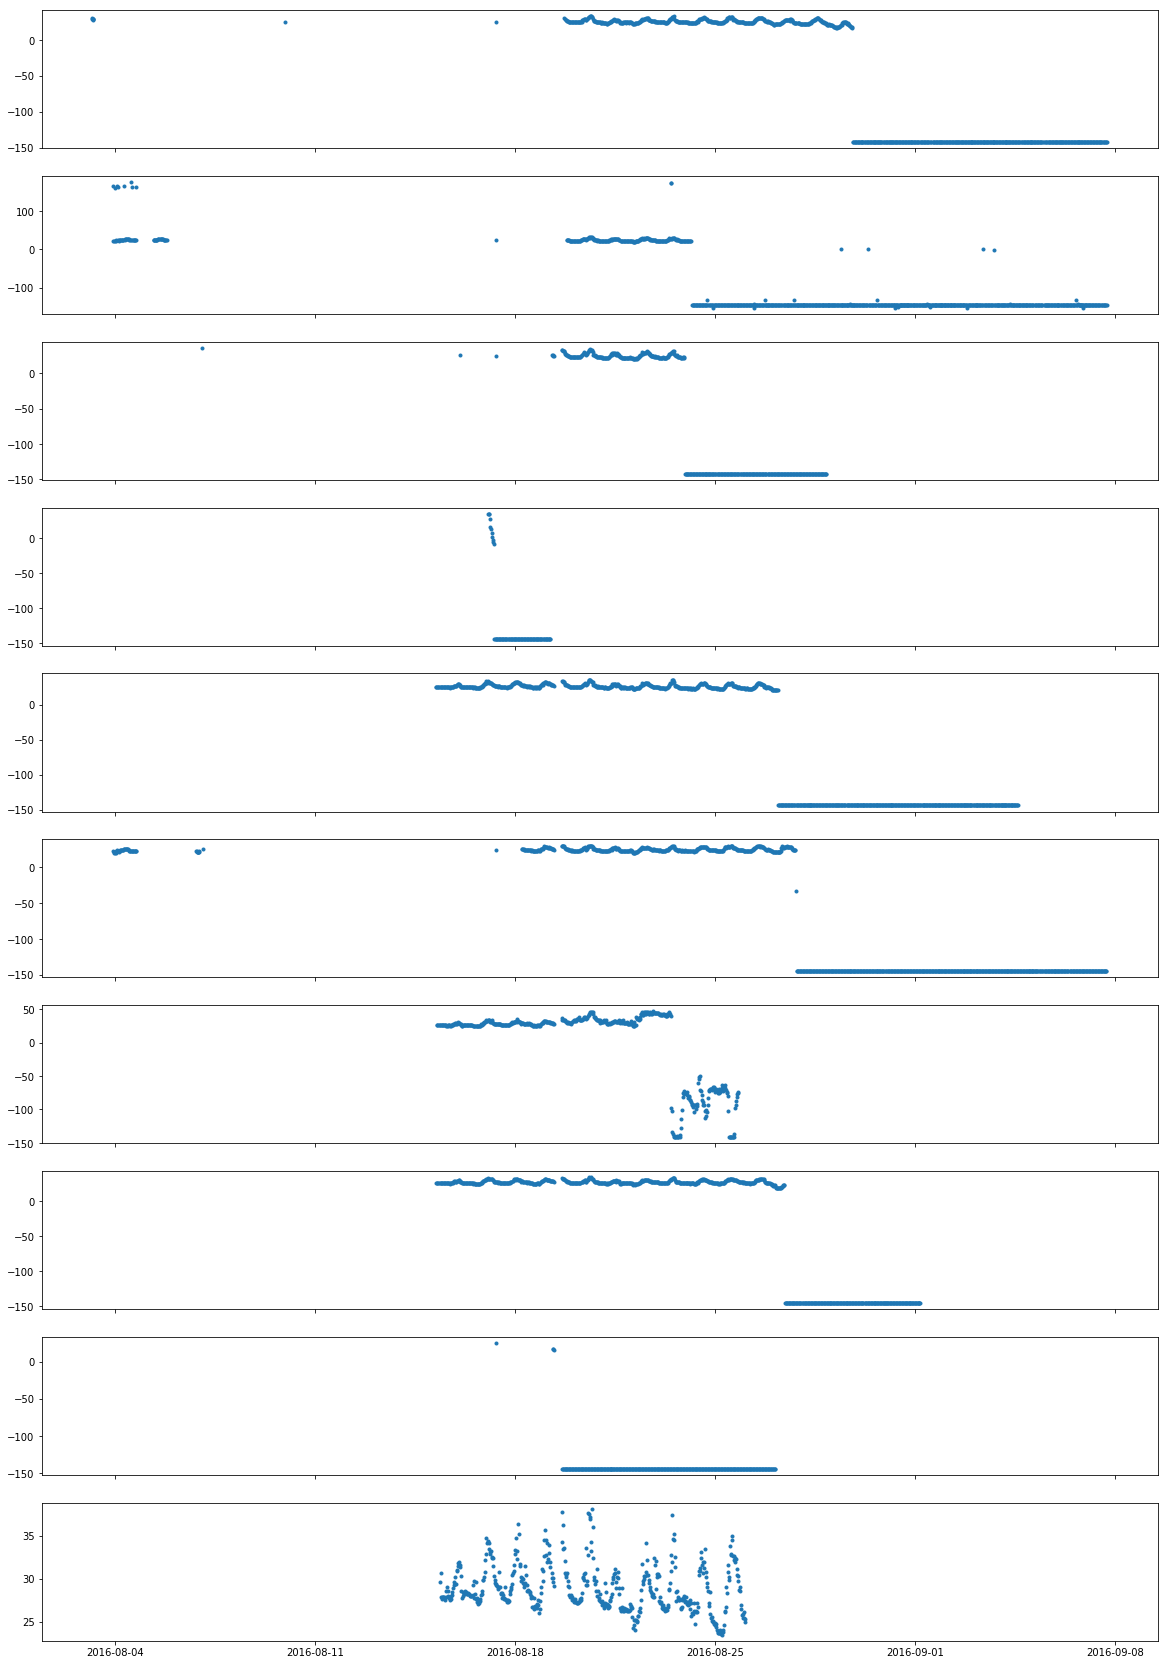

<Figure size 1440x1440 with 0 Axes>

In [59]:
# print sub panels for each sensor
fig, axarr = plt.subplots(10, sharex=True)
fig.set_size_inches(20,30) 
plt.figure(figsize=(20,20), linewidth=2)

for i,s in enumerate(temp_sensors):
    sub_df = full[full['sensor_id']==s]
   
    axarr[i].plot(sub_df.index, sub_df['value'], '.')
  

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [ ]:
# df.pivot(index='patient', columns='obs', values='score')

In [61]:
# make column headings temp sensor ID's
temp_df = full[full['sensor_id'].isin(temp_sensors)]
del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value');

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [62]:
# remove repeating timestamps and sensor_ids
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,timestamp,id,value,sensor_id,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id_y,type,si_unit,type_id
3683,2016-08-20 20:46:05,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3686,2016-08-20 20:46:05,0d34bc60-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6396,2016-08-21 08:21:30,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6398,2016-08-21 08:21:30,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6394,2016-08-21 08:51:26,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
6397,2016-08-21 08:51:26,a2c5c490-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3712,2016-08-21 09:15:37,b5280940-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3713,2016-08-21 09:15:37,b529de00-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3729,2016-08-21 15:45:34,00267df0-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3730,2016-08-21 15:45:34,0027b670-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA


**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [63]:
# drop rows where there are duplicates
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
tdf.head()

,timestamp,id,value,sensor_id,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id_y,type,si_unit,type_id
0,2016-08-03 04:39:25,764dbdf0-8679-11e6-a353-2f6c041e2491,29.30,763ca6f0-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,2016-08-03 04:47:41,76514060-8679-11e6-a353-2f6c041e2491,29.94,763ca6f0-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
2,2016-08-03 05:08:52,76584540-8679-11e6-a353-2f6c041e2491,28.61,763ca6f0-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
3,2016-08-03 05:14:08,765dea91-8679-11e6-a353-2f6c041e2491,28.24,763ca6f0-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
4,2016-08-03 05:28:55,7661bb20-8679-11e6-a353-2f6c041e2491,28.57,763ca6f0-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA


In [64]:
# use pivot to make index time, with columns as sensor_ids with corresponding value
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')

In [65]:
# resample to get one mean daily figure
daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [66]:
# calculate correlations
corr_df = daily_temp_cor_df.corr()

In [67]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

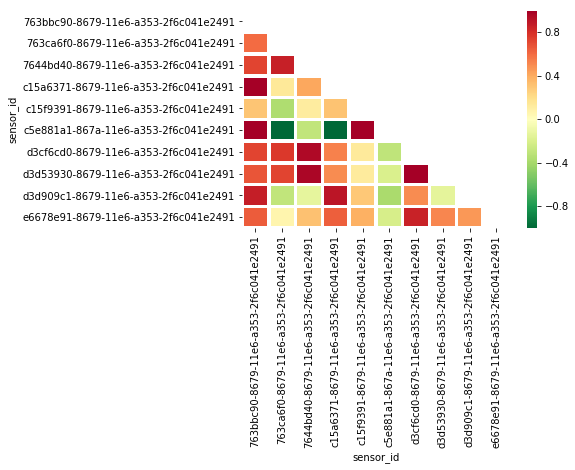

In [68]:
# Create the heatmap using seaborn library. 

# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [69]:
# remove all duplicates
full2 = full.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [70]:
# pivot data set with set index and columns with specific values
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [71]:
# resample full_wide to daily mean values
daily_all_sensors = full_wide.resample('D').mean()

In [72]:
# view daily_all_sensors
daily_all_sensors.head()

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [73]:
# check node names available
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [74]:
# merge the full and nodes datasets
fullnode = pd.merge(full, nodes, left_on='node_id', right_on='id')

In [75]:
# check columns and index set
fullnode.columns, fullnode.index

(Index([          u'id_x',          u'value',      u'timestamp',
             u'sensor_id',           u'id_x',  u'description_x',
        u'data_frequency',       u'status_x',   u'created_at_x',
          u'updated_at_x',   u'data_type_id',        u'node_id',
                  u'id_y',           u'type',        u'si_unit',
               u'type_id',           u'id_y',           u'name',
         u'description_y',       u'location',       u'status_y',
          u'created_at_y',   u'updated_at_y',     u'volcano_id'],
       dtype='object'),
 Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             63446, 63447, 63448, 63449, 63450, 63451, 63452, 63453, 63454,
             63455],
            dtype='int64', length=63456))

In [76]:
# set index to timestamp
fullnode.set_index('timestamp', inplace=True)

In [77]:
# check resample to a day
fullnode.resample('D').mean();

In [78]:
# pivot timestamp and name
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [79]:
# make the Node ('name') into its own column by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [80]:
# check fn_wide data
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [81]:
# resample the data to daily levels
lmfn = fn_wide.resample('D').mean()

In [82]:
# check shape of lmfn
lmfn.shape

(98, 7)

In [83]:
# remove null values
lmfn.isnull().sum()
lmfn = lmfn.fillna(lmfn.mean())

In [84]:
lmfn

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,
2016-07-01,306.902098,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-02,267.804196,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-03,286.972028,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-04,339.860140,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-05,445.828571,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-06,391.852113,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-07,305.769231,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-08,368.349650,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-09,265.442748,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781


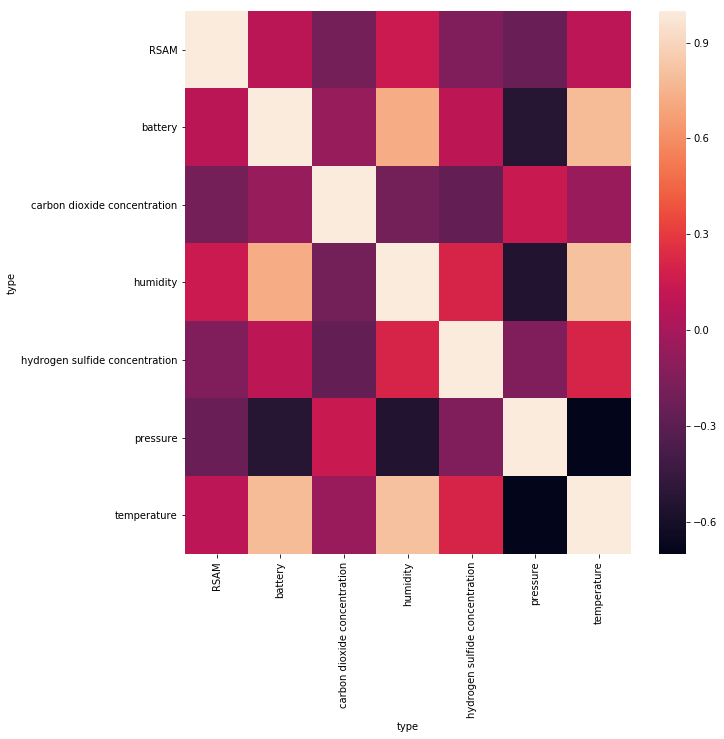

In [85]:
# check correlations of sensors to battery
corr = lmfn.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [91]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [92]:
# view sensors available
train.columns

Index([u'RSAM', u'battery', u'carbon dioxide concentration', u'humidity',
       u'hydrogen sulfide concentration', u'pressure', u'temperature'],
      dtype='object', name=u'type')

In [93]:
# split training and test set as well as set X and y
target, predictors = 'battery', 'temperature'

X_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
X_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()


In [94]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))


('Coefficients: ', 0.25446040432384015)
Mean squared error: 27.97


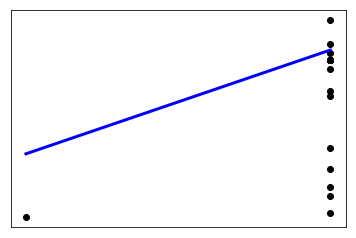

In [95]:
# plot the linear model
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Various sensors were tried with the linear model. Most have low MSE . Temperature was used for  this ML LR model.

### No, the linear regression is probably not the best fit. 
